In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
labels = ['Negative', 'Positive']
img_size = 120
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset = read_images('surface-crack-detection')

Text(0.5, 1.0, 'Number of Images')

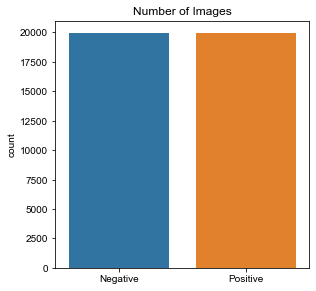

In [3]:
Im = []
for i in Dataset:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im)
axl.set_title("Number of Images")

In [4]:
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)

(-0.5, 119.5, 119.5, -0.5)

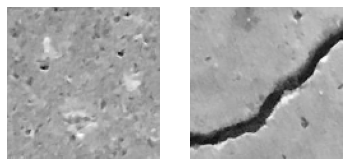

In [5]:
plt.subplot(1, 2, 1)
plt.imshow(x[1000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[30000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')


In [6]:
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0

In [5]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,shuffle=True,
    random_state= 42)

In [8]:
opt = Adam(lr=1e-5)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

history = model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.2, verbose=1)

Epoch 1/50
200/200 [==============================] - 487s 2s/step - loss: 0.3106 - accuracy: 0.8704 - val_loss: 0.5544 - val_accuracy: 0.9555
Epoch 2/50
200/200 [==============================] - 467s 2s/step - loss: 0.1405 - accuracy: 0.9497 - val_loss: 0.3278 - val_accuracy: 0.9697
Epoch 3/50
200/200 [==============================] - 425s 2s/step - loss: 0.1076 - accuracy: 0.9621 - val_loss: 0.1307 - val_accuracy: 0.9764
Epoch 4/50
200/200 [==============================] - 441s 2s/step - loss: 0.0847 - accuracy: 0.9725 - val_loss: 0.0812 - val_accuracy: 0.9716
Epoch 5/50
200/200 [==============================] - 530s 3s/step - loss: 0.0707 - accuracy: 0.9777 - val_loss: 0.0663 - val_accuracy: 0.9795
Epoch 6/50
200/200 [==============================] - 507s 3s/step - loss: 0.0594 - accuracy: 0.9818 - val_loss: 0.0538 - val_accuracy: 0.9870
Epoch 7/50
200/200 [==============================] - 467s 2s/step - loss: 0.0516 - accuracy: 0.9855 - val_loss: 0.0432 - val_accuracy: 0.9875

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


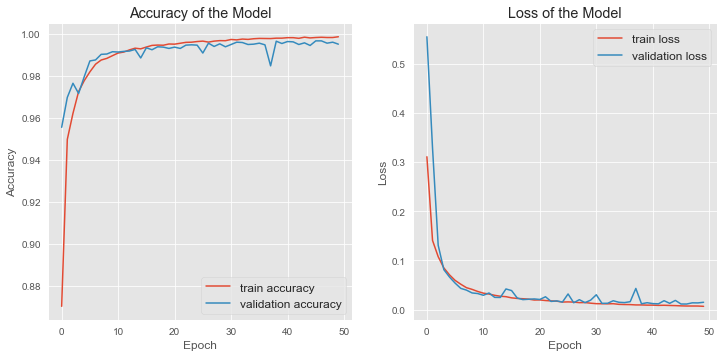

In [10]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

250/250 [==============================] - 30s 119ms/step
              precision    recall  f1-score   support

    Negative       0.99      1.00      1.00      4014
    Positive       1.00      0.99      1.00      3986

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [12]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.99575


In [15]:
model.save('cnn.h5')


1/1 [==============================] - 0s 102ms/step
Model predicts: Positive


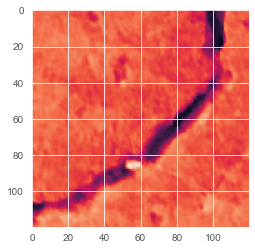

In [14]:
import random


X = random.randint(0, 8000)

img_size = 120

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],120,120,1)

predictions_single = model.predict(img_single)
print('Model predicts:',labels[np.argmax(predictions_single)])
plt.imshow(np.squeeze(img_single))
# plt.grid(False)
plt.show()

In [81]:
import joblib

joblib.dump(model, 'my_model.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-19 15:38:21         4808
metadata.json                                  2023-03-19 15:38:21           64
variables.h5                           

['my_model.pkl']

In [6]:
from keras.layers import LSTM

In [7]:
model2 = Sequential()
model2.add(LSTM(64, input_shape=(120, 120), return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(32, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(16))
model2.add(Dense(2, activation='softmax'))

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 64)           47360     
                                                                 
 dropout (Dropout)           (None, 120, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 32)           12416     
                                                                 
 dropout_1 (Dropout)         (None, 120, 32)           0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 2)                 34        
                                                                 
Total params: 62,946
Trainable params: 62,946
Non-traina

In [8]:
from keras.utils import to_categorical

# Convert y_train to one-hot encoding
y_train = to_categorical(y_train)




In [9]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.2, verbose=1)

Epoch 1/50
200/200 [==============================] - 68s 312ms/step - loss: 0.6684 - accuracy: 0.5919 - val_loss: 0.6921 - val_accuracy: 0.5008
Epoch 2/50
200/200 [==============================] - 50s 248ms/step - loss: 0.6393 - accuracy: 0.6371 - val_loss: 0.5130 - val_accuracy: 0.8014
Epoch 3/50
200/200 [==============================] - 52s 260ms/step - loss: 0.6246 - accuracy: 0.6274 - val_loss: 0.6774 - val_accuracy: 0.6398
Epoch 4/50
200/200 [==============================] - 55s 274ms/step - loss: 0.6585 - accuracy: 0.6059 - val_loss: 0.6908 - val_accuracy: 0.4992
Epoch 5/50
200/200 [==============================] - 49s 246ms/step - loss: 0.6915 - accuracy: 0.5224 - val_loss: 0.6925 - val_accuracy: 0.4992
Epoch 6/50
200/200 [==============================] - 49s 244ms/step - loss: 0.6263 - accuracy: 0.6525 - val_loss: 0.5225 - val_accuracy: 0.7628
Epoch 7/50
200/200 [==============================] - 46s 228ms/step - loss: 0.5397 - accuracy: 0.7507 - val_loss: 0.6354 - val_ac

In [10]:
print(history2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


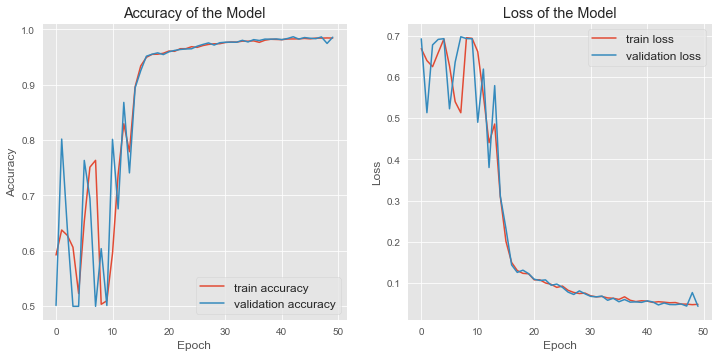

In [12]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred_prob_lstm = model2.predict(x_test)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

print(classification_report(y_test, y_pred_lstm, target_names=['Negative', 'Positive']))

250/250 [==============================] - 13s 42ms/step
              precision    recall  f1-score   support

    Negative       0.98      0.99      0.98      4014
    Positive       0.99      0.98      0.98      3986

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000



In [14]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred_lstm)
print('Accuracy:', accuracy)

Accuracy: 0.98425


In [41]:
model2.save('lstm.h5')

1/1 [==============================] - 1s 995ms/step
Model predicts: Negative


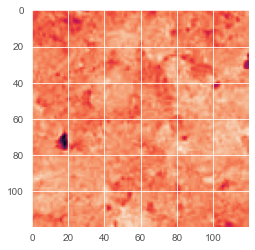

In [15]:
import random


X = random.randint(0, 8000)

img_size = 120

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],120,120,1)

predictions_single = model2.predict(img_single)
print('Model predicts:',labels[np.argmax(predictions_single)])
plt.imshow(np.squeeze(img_single))
# plt.grid(False)
plt.show()

In [50]:
import joblib

joblib.dump(model2, 'lstm.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                 

['lstm.pkl']

In [51]:
import joblib

joblib.dump(model, 'cnn.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-23 10:43:24         4808
metadata.json                                  2023-03-23 10:43:24           64
variables.h5                           

['cnn.pkl']